<a href="https://colab.research.google.com/github/19msk/octo-disco/blob/main/Bank_Nifty_Price_Prediction_and_comparison_of_results_of_ARIMA_and_LSTM_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf 


In [2]:
banknifty=yf.download('^NSEBANK','2018-04-01','2023-05-22')
banknifty

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,24235.650391,24373.400391,24062.949219,24328.500000,24328.216797,0
2018-04-03,24285.949219,24538.000000,24254.349609,24510.599609,24510.314453,0
2018-04-04,24502.500000,24666.300781,24087.800781,24129.500000,24129.218750,0
2018-04-05,24394.449219,24824.900391,24380.849609,24759.800781,24759.513672,0
2018-04-06,24776.349609,24933.599609,24626.400391,24873.150391,24872.861328,0
...,...,...,...,...,...,...
2023-05-15,43821.050781,44151.699219,43666.601562,44072.101562,44072.101562,161300
2023-05-16,44144.148438,44144.148438,43815.699219,43903.699219,43903.699219,222500
2023-05-17,43948.500000,43992.750000,43446.398438,43698.699219,43698.699219,203600


In [3]:
from datetime import date

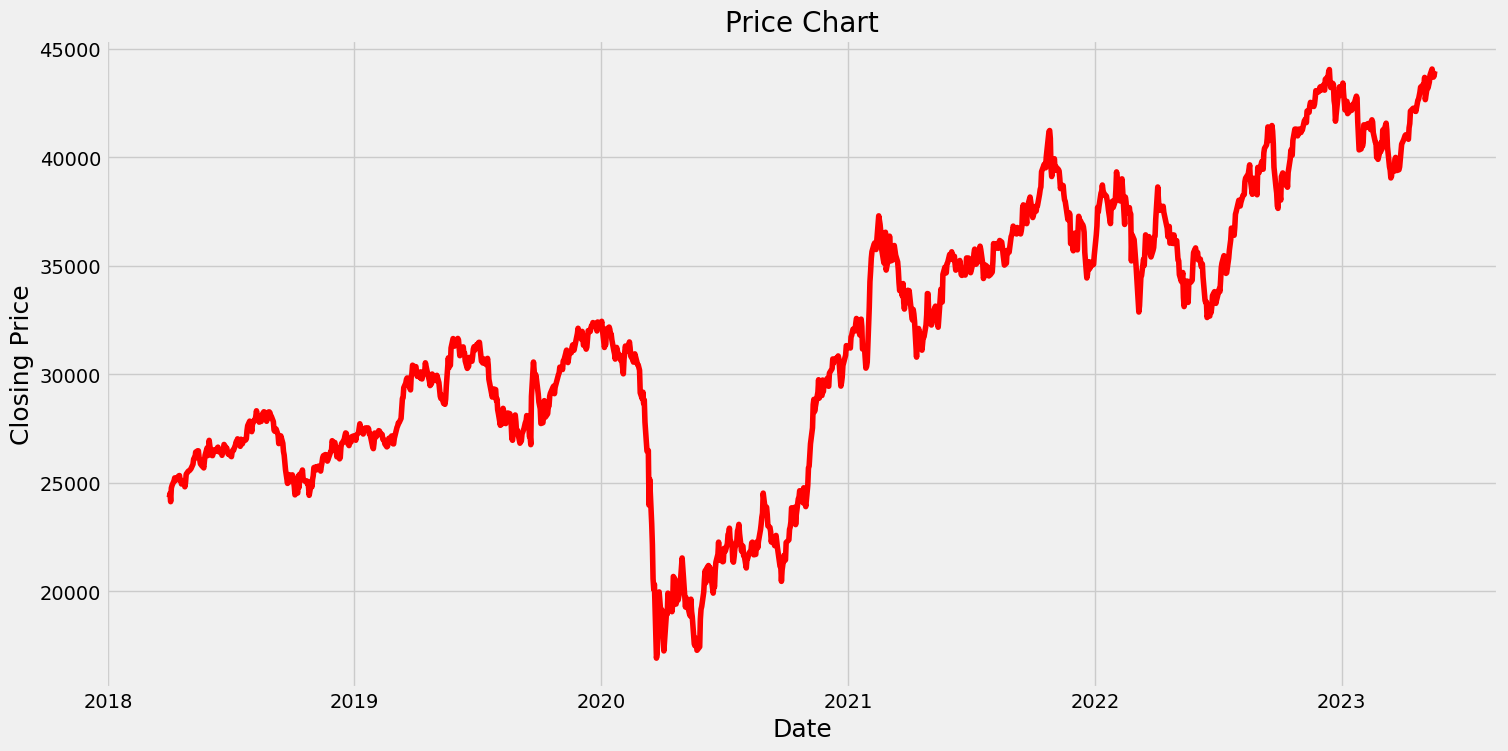

In [4]:
plt.figure(figsize=(16,8))
plt.title('Price Chart')
plt.plot(banknifty['Close'],color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)
plt.show()

In [6]:
### log return
lr=banknifty['Log return']=np.log(banknifty['Close']/banknifty['Close'].shift(1))
lr 

Date
2018-04-02         NaN
2018-04-03    0.007457
2018-04-04   -0.015671
2018-04-05    0.025786
2018-04-06    0.004568
                ...   
2023-05-15    0.006340
2023-05-16   -0.003828
2023-05-17   -0.004680
2023-05-18    0.001226
2023-05-19    0.004950
Name: Close, Length: 1263, dtype: float64

In [8]:
logreturn=lr.drop('2018-04-02')
logreturn

Date
2018-04-03    0.007457
2018-04-04   -0.015671
2018-04-05    0.025786
2018-04-06    0.004568
2018-04-09    0.008832
                ...   
2023-05-15    0.006340
2023-05-16   -0.003828
2023-05-17   -0.004680
2023-05-18    0.001226
2023-05-19    0.004950
Name: Close, Length: 1262, dtype: float64

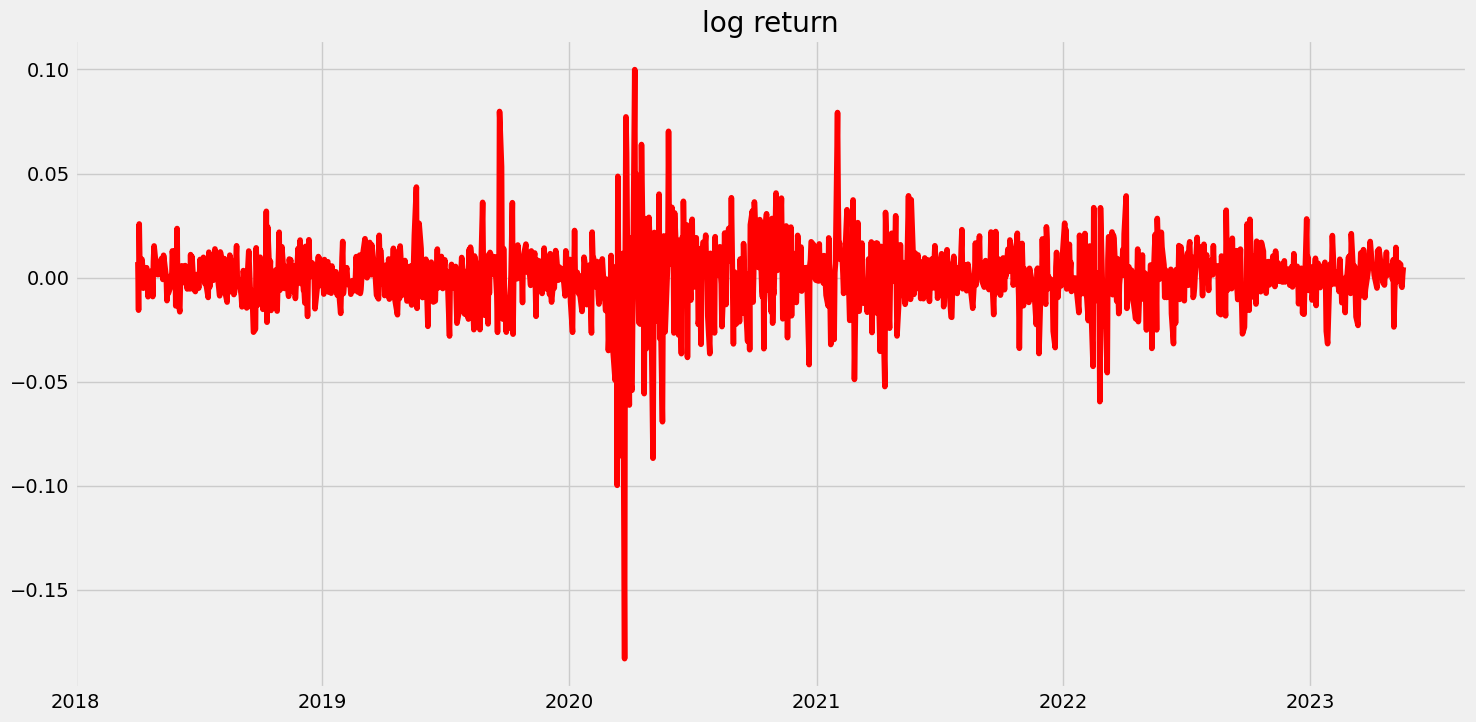

In [9]:
plt.figure(figsize=(16,8))
plt.title('log return')
plt.plot(logreturn,color='red')
plt.show()

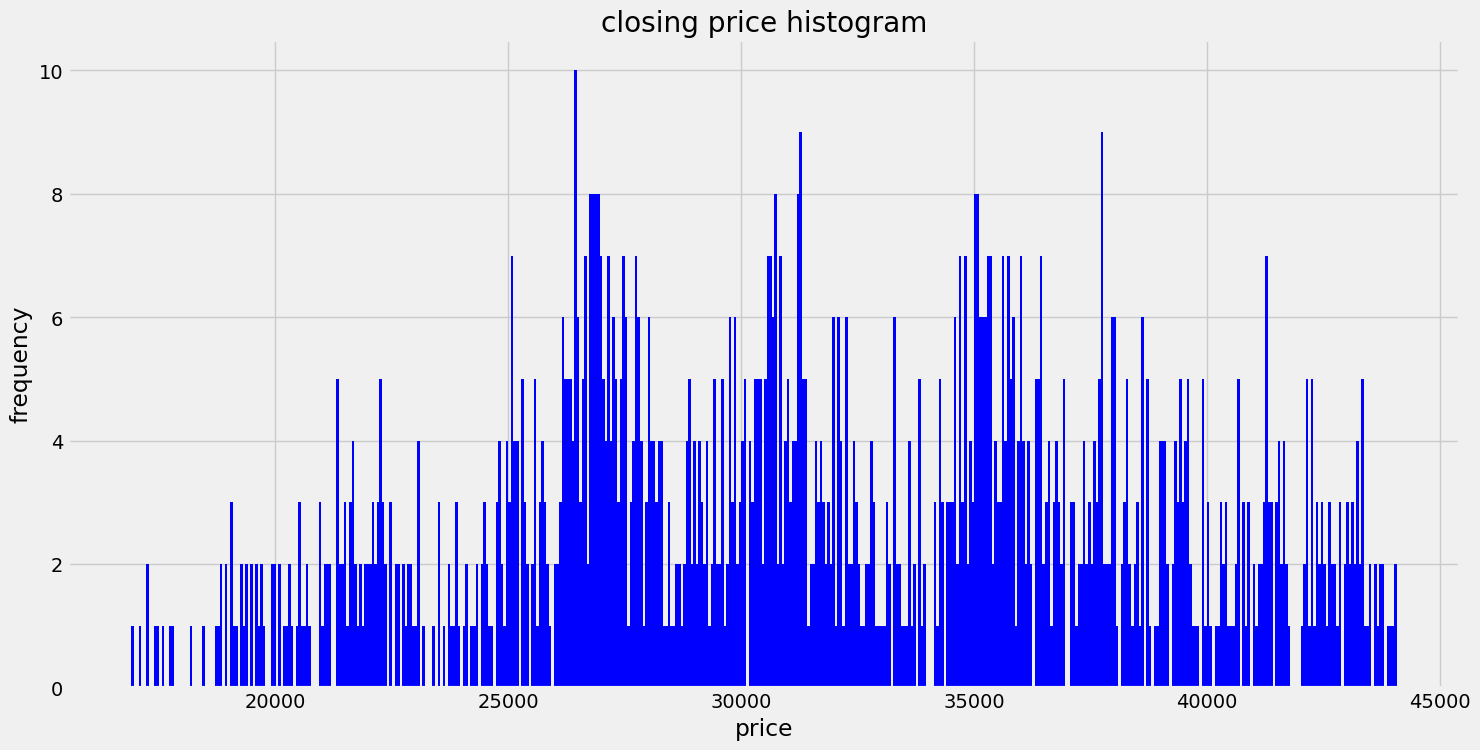

In [10]:
### histogram of closing price
plt.figure(figsize=(16,8))
plt.title('closing price histogram')
plt.hist(banknifty['Close'],bins=500,color='blue')
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

In [11]:
### summary statistics
banknifty['Close'].describe()

count     1263.000000
mean     31719.108515
std       6378.091723
min      16917.650391
25%      26887.725586
50%      31283.300781
75%      36548.824219
max      44072.101562
Name: Close, dtype: float64

ARIMA Model

In [12]:
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
## only closing data
close_df=pd.DataFrame(logreturn)
close_df

,Close
Date,
2018-04-03,0.007457
2018-04-04,-0.015671
2018-04-05,0.025786
2018-04-06,0.004568
2018-04-09,0.008832
...,...
2023-05-15,0.006340
2023-05-16,-0.003828
2023-05-17,-0.004680


In [31]:
#creating numpy array
dataset=close_df.values
dataset

array([[ 0.00745716],
       [-0.0156705 ],
       [ 0.02578624],
       ...,
       [-0.00468025],
       [ 0.00122587],
       [ 0.0049497 ]])

In [32]:
### training data length
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1010

In [33]:
### training data set
training_data_set= list(dataset[0:training_data_len])
training_data_set

[array([0.00745716]),
 array([-0.0156705]),
 array([0.02578624]),
 array([0.00456752]),
 array([0.00883191]),
 array([0.00528612]),
 array([-0.00510883]),
 array([0.00385139]),
 array([0.00021827]),
 array([0.00476036]),
 array([0.00053695]),
 array([-0.00920559]),
 array([0.00094965]),
 array([-0.00728187]),
 array([0.00067332]),
 array([0.00325779]),
 array([-0.00913425]),
 array([0.0078876]),
 array([0.01522479]),
 array([0.00538035]),
 array([0.00143645]),
 array([0.00144408]),
 array([0.00156682]),
 array([0.0080257]),
 array([0.00918133]),
 array([0.00244805]),
 array([-0.00089697]),
 array([0.01073966]),
 array([0.00234456]),
 array([-4.34526566e-05]),
 array([-0.01108522]),
 array([-0.00414689]),
 array([-0.00763058]),
 array([-0.0048347]),
 array([0.00104402]),
 array([-0.00360456]),
 array([0.01283733]),
 array([0.00982025]),
 array([0.01288403]),
 array([-0.01359793]),
 array([0.00277659]),
 array([0.02358785]),
 array([-0.0098194]),
 array([-0.0164403]),
 array([-0.00024951

In [17]:
### testing data set
testing_data_set=list(dataset[training_data_len:])
testing_data_set

[-0.012326496776502023,
 0.014276545621954299,
 0.02074601831943323,
 -0.004037046667976506,
 -0.025136444349152666,
 0.02842981547144693,
 -0.0008404902426955274,
 0.001241560467491319,
 0.00143819973233816,
 0.02175948116366777,
 0.014663409283769257,
 0.005981196158574832,
 -0.009522721818000332,
 0.003752098962469901,
 -0.00020081137293756257,
 -0.009553010141615857,
 0.0009959145970342498,
 -0.008938082672714386,
 -0.001425508711285588,
 0.003978231816216276,
 -0.017296821153731094,
 -0.03175859007563853,
 -0.002832854459450881,
 0.0008296562114907376,
 -0.021891204120689338,
 0.003854070929376182,
 -0.001780587746625213,
 0.015391189133114842,
 -0.010492667168004215,
 0.00878144164139881,
 0.01475254894849671,
 0.005450912857948838,
 -0.00500494815168313,
 -0.011135601844309442,
 0.00465412415181986,
 0.0034151731343285345,
 0.011898396165422483,
 -0.0036896709282066707,
 0.014921041577729959,
 0.01721624292042649,
 0.0058177588952382075,
 0.009791253924041069,
 -0.00955784514230

Showing Test-Train Split 

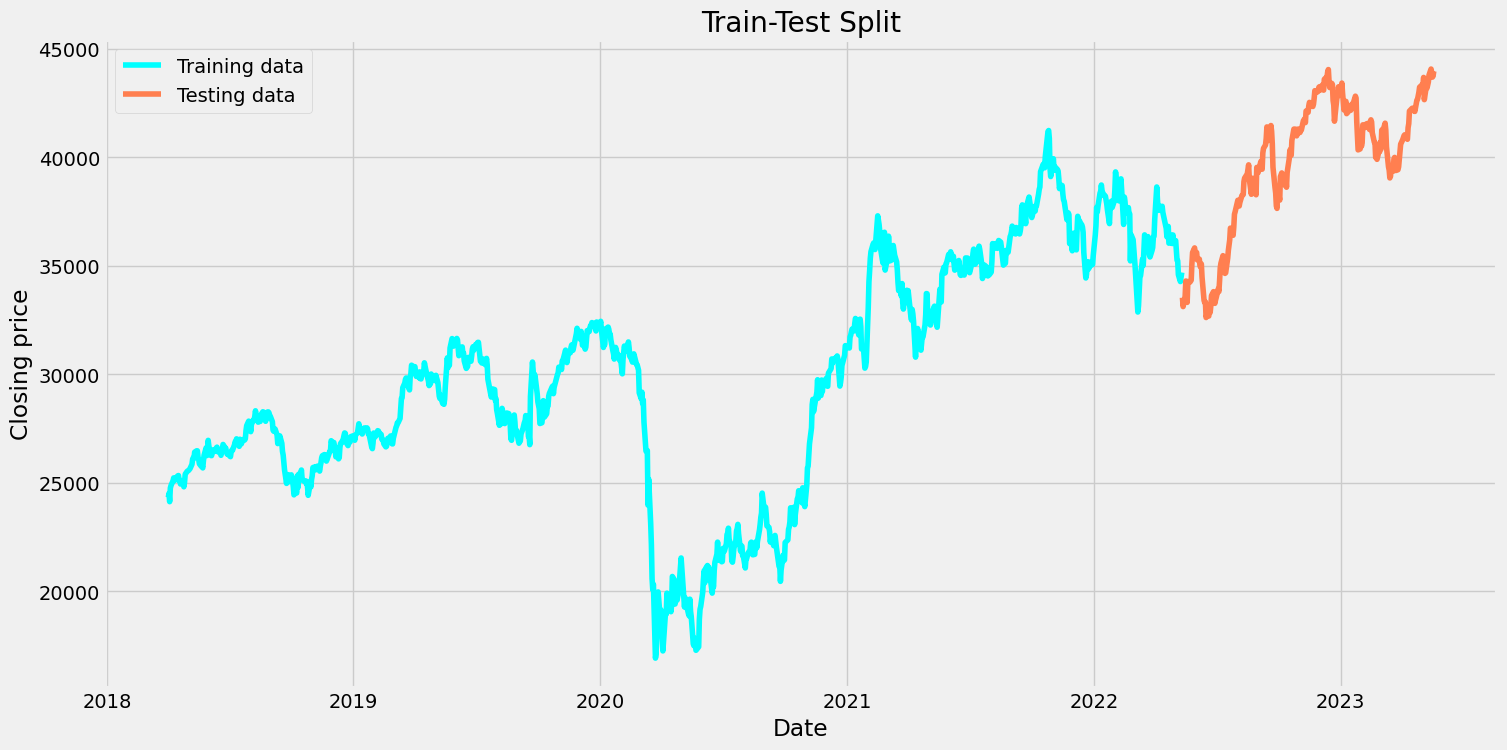

In [34]:
plt.figure(figsize=(16,8))
plt.title('Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.plot(banknifty[0:training_data_len]['Close'],'cyan',label='Training data')
plt.plot(banknifty[training_data_len:]['Close'],'coral',label='Testing data')
plt.legend()

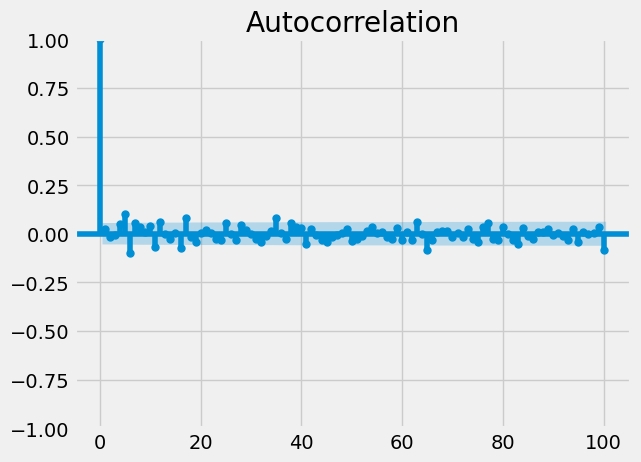

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_plot = plot_acf(close_df, lags = 100)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


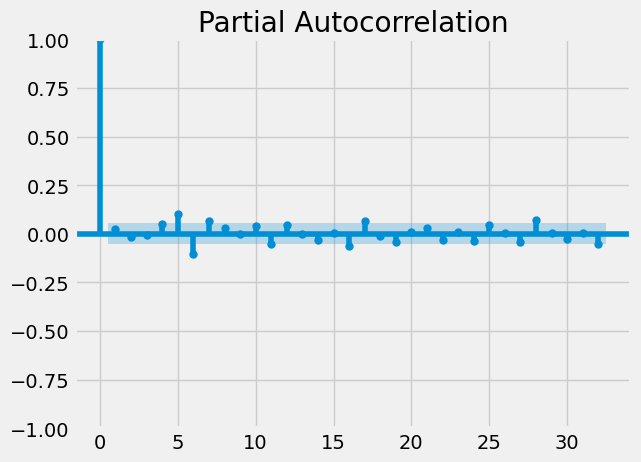

In [36]:
pacf_plot = plot_pacf(close_df)

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

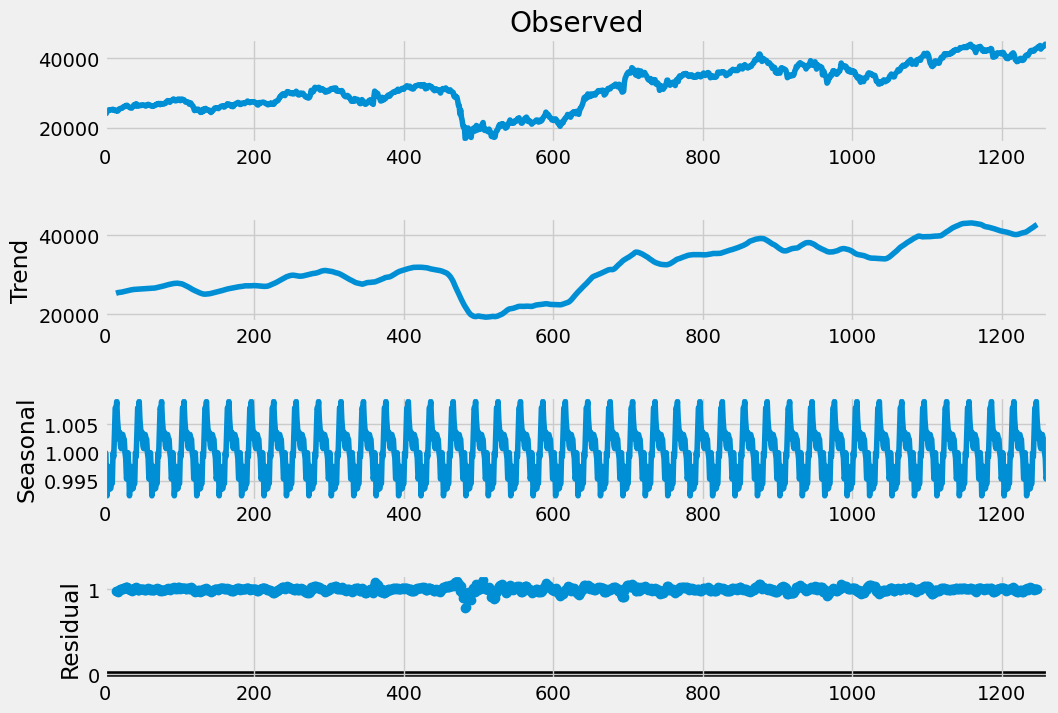

In [ ]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(dataset, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(12, 8)

In [23]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.2 MB/s eta 0:00:00


In [24]:
from pmdarima.arima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5263.932, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5262.425, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5262.448, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-5260.760, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5262.252, Time=0.40 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.967 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1010
Model:                        SARIMAX   Log Likelihood                2632.966
Date:                Tue, 06 Jun 2023   AIC                          -5263.932
Time:                        07:06:03   BIC                          -5259.014
Sample:                             0   HQIC                         -5262.063
                               - 1010                                  

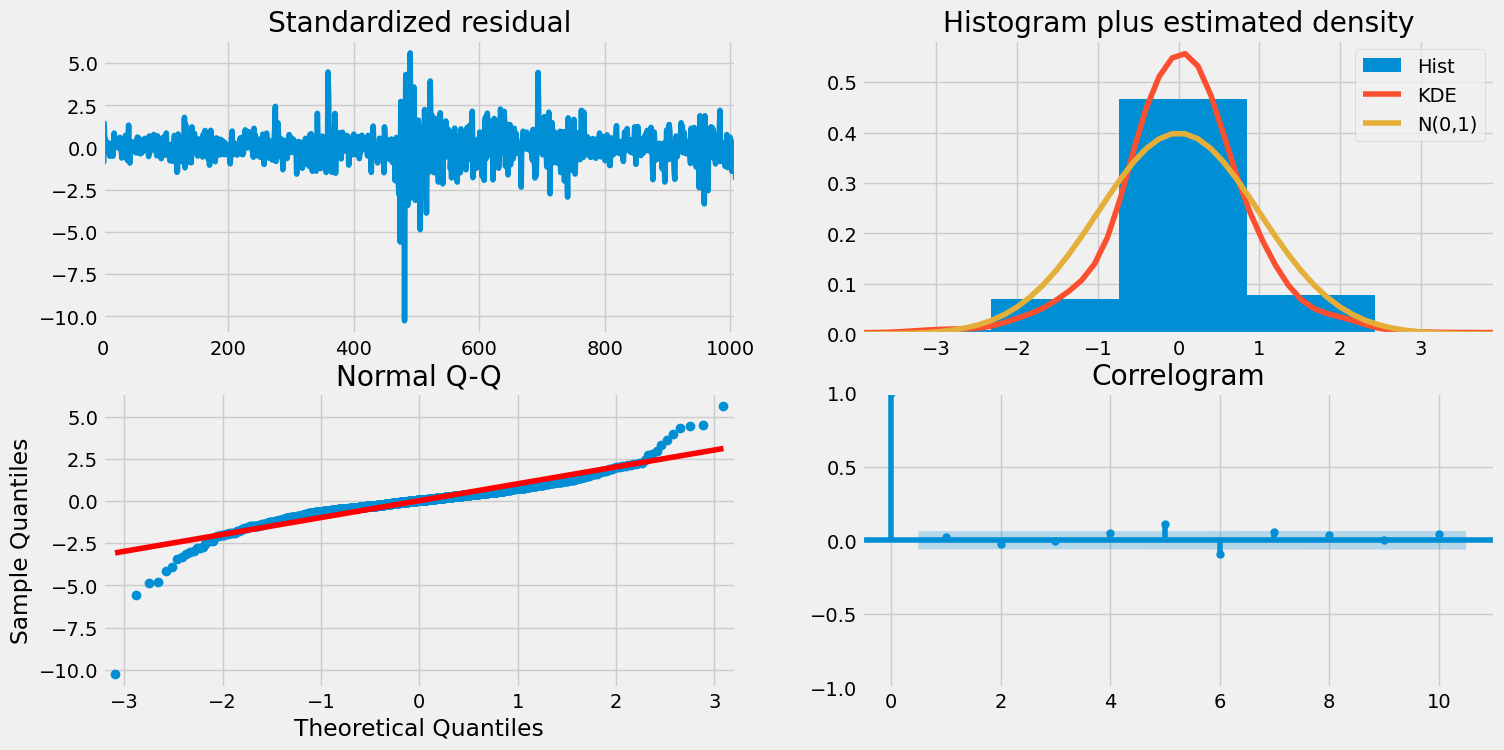

In [25]:
### finding p,d,q  using autoarima
autoarima=auto_arima(training_data_set,start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(autoarima.summary())
autoarima.plot_diagnostics(figsize=(16,8))
plt.show()

from the autoarima model applied above we came to that the best fit is at
(0,1,0) where p=0,d=1,q=0

In [26]:
model_predictions= []
for i in range(len(testing_data_set)):
  model= ARIMA(training_data_set,order=(0,1,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=list(output)
  model_predictions.append(yhat)
  validation_set=testing_data_set[i]
  ## updating training dataset
  training_data_set.append(validation_set)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

In [27]:
### model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1261
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2951.802
Date:                Tue, 06 Jun 2023   AIC                          -5901.604
Time:                        07:07:55   BIC                          -5896.465
Sample:                             0   HQIC                         -5899.673
                               - 1261                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0005   7.96e-06     67.829      0.000       0.001       0.001
Ljung-Box (L1) (Q):                 287.68   Jarque-Bera (JB):              8340.29
Prob(Q):                              0.00   Pr

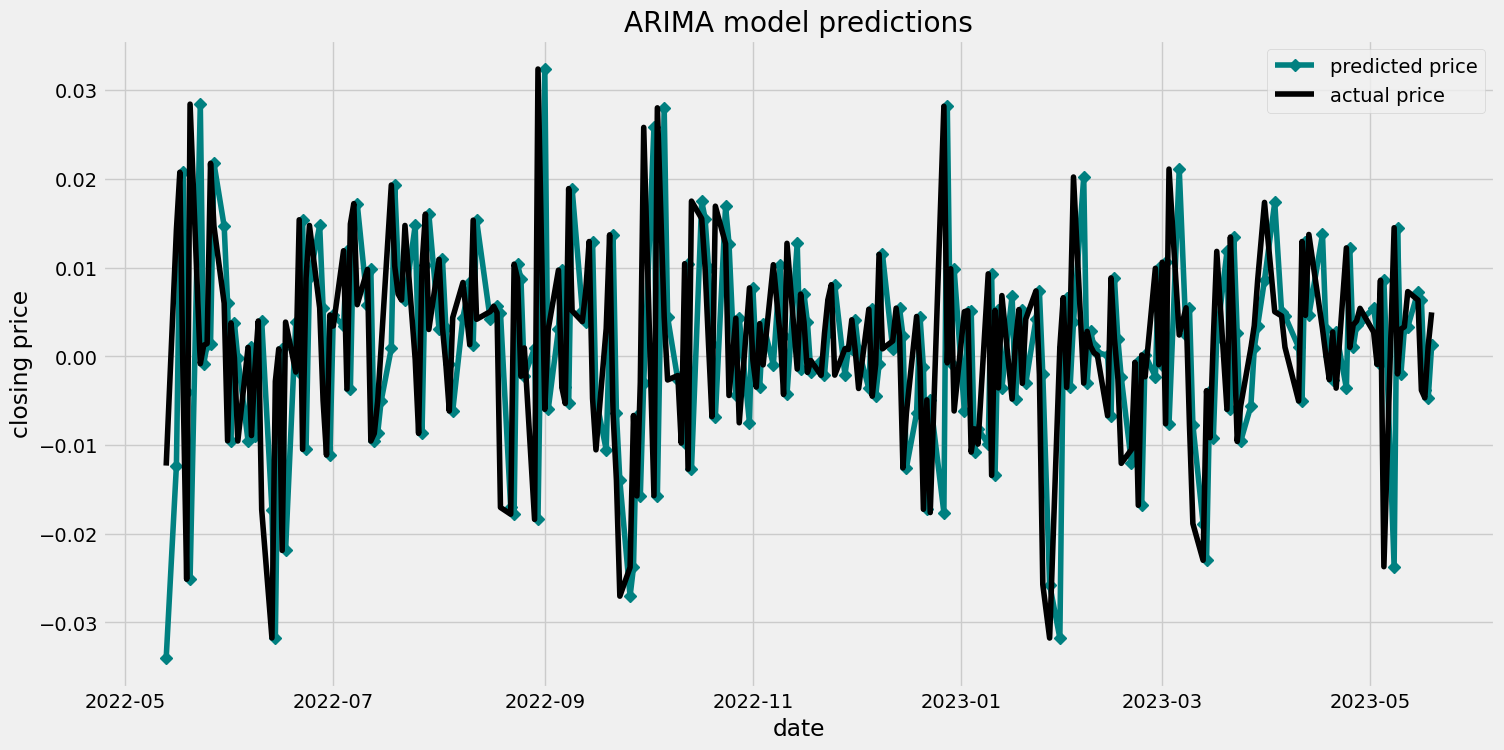

In [42]:
plt.figure(figsize=(16,8))
dates=close_df[training_data_len:].index
plt.title('ARIMA model predictions')
plt.plot(dates,model_predictions,color='teal',marker='D',label='predicted price')
plt.plot(dates,testing_data_set,color='black', label='actual price')
plt.xlabel('date')
plt.ylabel('closing price')
plt.legend()
plt.show()

Performance Evaluation

In [43]:
mse = mean_squared_error(testing_data_set, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(testing_data_set, model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(testing_data_set, model_predictions))
print('RMSE: '+str(rmse))

MSE: 0.0002093980375126019
MAE: 0.011034861868672483
RMSE: 0.014470592161781145


LSTM Model

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
#scaling the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [47]:
scaled_data

array([[0.6732591 ],
       [0.59155943],
       [0.73800755],
       ...,
       [0.63038309],
       [0.65124674],
       [0.66440138]])

In [48]:
training_dataset= scaled_data[0:training_data_len,:]
#spliitting into xtrain and ytrain
x_train=[]
y_train=[]
for i in range(60,len(training_dataset)):
  x_train.append(training_dataset[i-60:i,0])
  y_train.append(training_dataset[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.6732591 , 0.59155943, 0.73800755, 0.66305131, 0.67811549,
       0.66558979, 0.6288691 , 0.66052155, 0.64768736, 0.66373254,
       0.6488131 , 0.61439707, 0.65027098, 0.62119272, 0.64929483,
       0.65842463, 0.6146491 , 0.67477966, 0.70069868, 0.66592266,
       0.65199063, 0.65201757, 0.65245119, 0.6752675 , 0.67934984,
       0.65556418, 0.64374771, 0.68485471, 0.6551986 , 0.6467628 ,
       0.60775717, 0.63226721, 0.61996087, 0.62983747, 0.65060436,
       0.63418301, 0.69226483, 0.68160684, 0.6924298 , 0.59888092,
       0.65672474, 0.73024162, 0.61222875, 0.58884009, 0.64603489,
       0.66257217, 0.66698214, 0.63805294, 0.64721026, 0.66736161,
       0.65165307, 0.63621995, 0.62759983, 0.64583305, 0.62766234,
       0.68596473, 0.63882643, 0.68271718, 0.62611527, 0.64585411])]
[0.6231595432468355]

[array([0.6732591 , 0.59155943, 0.73800755, 0.66305131, 0.67811549,
       0.66558979, 0.6288691 , 0.66052155, 0.64768736, 0.66373254,
       0.6488131 , 0.61439707, 0.650

In [49]:
## convering to numpy arrays
x_train=np.array(x_train)
y_train=np.array(y_train)
## lstm works with only 3d data

In [50]:
## reshaping data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(950, 60, 1)

In [51]:
from tensorflow.keras.layers import Dense, Dropout,LSTM

In [52]:
from tensorflow.keras.models import Sequential

In [ ]:
## building LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
##compiling model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit( x_train, y_train, batch_size=1, epochs=1)

951/951 [==============================] - 17s 18ms/step - loss: 0.0013


In [ ]:
##create the testing data set
## creating neew array containing scaled values from 1011 till 1263
testing_data=scaled_data[training_data_len-60: , :]
#create the data set 
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(testing_data)):
  x_test.append(testing_data[i-60:i,0])

In [ ]:
## converting to numpy array
x_test=np.array(x_test)

In [ ]:
##reshaping the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
## get the model's predicted price values
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction)

8/8 [==============================] - 0s 10ms/step


The Output of the Model

1. plots of test and training data set along with predictions
2. values of actual and predictions



<ipython-input-70-7369d5258724>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


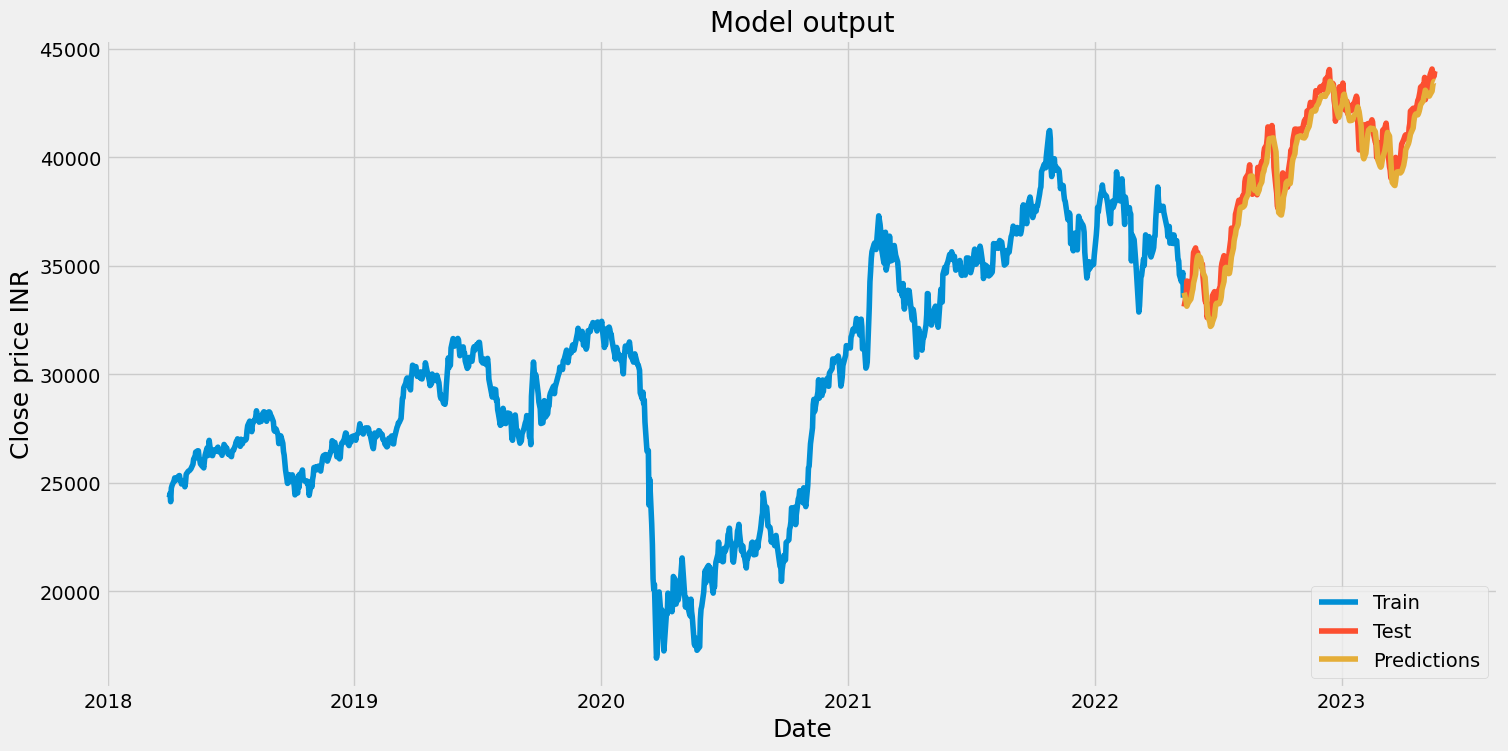

In [ ]:
## plot the data
train=close_df[:training_data_len]
valid=close_df[training_data_len:]
valid['prediction']=prediction
## visualization
plt.figure(figsize=(16,8))
plt.title('Model output')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price INR',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Test','Predictions'],loc='lower right')
plt.show()

In [ ]:
### values of atual and predictions
valid

,Close,prediction
Date,,
2022-05-13,33121.351562,33761.792969
2022-05-16,33597.601562,33369.925781
2022-05-17,34301.898438,33139.125000
2022-05-18,34163.699219,33203.722656
2022-05-19,33315.648438,33362.433594
...,...,...
2023-05-15,44072.101562,43050.011719
2023-05-16,43903.699219,43292.609375
2023-05-17,43698.699219,43462.898438


Evaluating the performance of the Model

In [ ]:
## model evaluation
## get root meaned squared error(RMSE)
rmse_model=np.sqrt( np.mean(prediction- y_test)**2)
rmse_model

431.57591610863096